NEURAL NETWORK FOR THE UDDER TEMPERATURE

In [31]:
#importing dependencies
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import keras
from sklearn.model_selection import train_test_split

Data preprocessing

In [57]:
#Data preprocessing
udder_temp = pd.read_csv('uddertemperature.csv')
udder_temp.head()

,UdderSurfaceTemp,Status
0,28.94,Healthy
1,31.39,Healthy
2,30.41,Healthy
3,31.75,Healthy
4,33.09,Healthy


In [59]:
# Renaming some of the columns 
udder_temp = udder_temp.rename(columns={'Status':'target'})

In [13]:
#data cleaning
#removing null values
udder_temp = udder_temp.dropna()
udder_temp.isnull().sum()

UdderSurfaceTemp    0
target              0
dtype: int64

In [61]:
#check for missing values
missing_values = udder_temp.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/udder_temp.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [35]:
#replace the strings in target column with corresponding numbers
udder_temp =udder_temp.replace({'clinical': 2, 'subclinical': 1, 'Healthy': 0})
udder_temp.head()

,UdderSurfaceTemp,target
0,28.94,0
1,31.39,0
2,30.41,0
3,31.75,0
4,33.09,0


In [36]:
# checking the distribution of the target variable
udder_temp['target'].value_counts()

0    1079
1    1025
2    1020
Name: target, dtype: int64

'clinical': 2, 'subclinical': 1, 'Healthy': 0

Splitting the target and features

In [37]:
X = udder_temp.drop(columns='target',axis = 1)
y = udder_temp['target']

spliting data into testing and training data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(3124, 1) (2499, 1) (625, 1)


In [40]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [22]:
print(X_train_std)

[[ 1.1787516 ]
 [-0.19236157]
 [-0.07898787]
 ...
 [-0.23841964]
 [ 1.14686524]
 [ 1.13269353]]


BUILDING A NUERAL NETWORK

In [41]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed (3)
from tensorflow import keras


In [42]:
from tensorflow.python.ops.math_ops import sigmoid
# setting up the layers of the nueral network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,)),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(30,activation = 'relu'),
    keras.layers.Dense(3, activation = 'sigmoid')
])

In [43]:
#compiling the nueral network
model.compile(loss='sparse_categorical_crossentropy', 
               optimizer= 'adam', 
               metrics=['accuracy']
               )

Training the Nueral Network

In [46]:
history = model.fit(X_train_std,y_train, validation_split=0.1, epochs = 100)

Epoch 1/100
71/71 [==============================] - 1s 8ms/step - loss: 0.0338 - accuracy: 0.9867 - val_loss: 0.0511 - val_accuracy: 0.9800
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9871 - val_loss: 0.0511 - val_accuracy: 0.9800
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9876 - val_loss: 0.0492 - val_accuracy: 0.9680
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.9871 - val_loss: 0.0492 - val_accuracy: 0.9680
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.9858 - val_loss: 0.0491 - val_accuracy: 0.9680
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9871 - val_loss: 0.0496 - val_accuracy: 0.9680
Epoch 7/100
71/71 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.9876 - val_loss: 0.0502 - val_accuracy: 0.9760
Epoch 8/100
7

VISUALISING ACCURACY AND LOSS

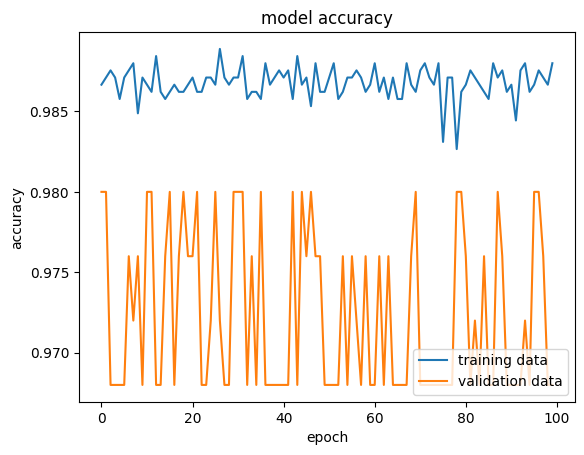

In [47]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'], loc ='lower right')

Accuracy of the model on test data

In [48]:
loss, accuracy = model.evaluate(X_test_std,y_test)
print(accuracy)

20/20 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9856
0.9855999946594238


In [49]:
#predictioon
y_pred = model.predict(X_test_std)
print(y_pred)

20/20 [==============================] - 0s 4ms/step
[[2.88495175e-06 1.85916026e-03 9.99926209e-01]
 [1.62807219e-02 9.98214900e-01 1.42215495e-05]
 [9.99756396e-01 6.82462426e-03 1.01208079e-05]
 ...
 [1.57844647e-06 1.00305467e-03 9.99962687e-01]
 [9.99718249e-01 7.61128450e-03 1.20310397e-05]
 [2.22284254e-02 9.97761965e-01 1.92236657e-05]]


In [50]:
#converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 

BUILDING THE PREDICTIVE SYSTEM

In [51]:
input_temp = (37.11)
#converting the input data into a numpyarray 
input_udder_temp = np.asarray(input_temp)

#reshaping the numpy array
input_temp_reshaped = input_udder_temp.reshape(1,-1)
input_temp_reshaped.shape

(1, 1)

In [52]:
#standardizing the data 
input_temp_std = scaler.transform(input_temp_reshaped)



c:\Users\Binarique Ltd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
prediction = model.predict(input_temp_std)

print(prediction)
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0]==2):
    print("clinical Mastitis Detected")
  
elif (prediction_label[0]==1):
    print ("subclinical mastitis Detected")

else:
    print("Healthy animal and no mastitis Detected")

1/1 [==============================] - 0s 36ms/step
[[5.1305083e-06 3.3487217e-03 9.9985862e-01]]
[2]
clinical Mastitis Detected


SAVING THE TRAINED MODEL

In [54]:
import pickle
# dump model
filename = 'NNuddertemperature_model.pkl'
pickle.dump(model,open(filename,'wb'))
scalerfile = 'scaler.sav'
pickle.dump(model, open(scalerfile, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-11-26 16:05:55         1964
metadata.json                                  2022-11-26 16:05:55           64
variables.h5                                   2022-11-26 16:05:56        32240
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1


In [30]:
import pickle
input_temp = (34.11)
#converting the input data into a numpyarray 
input_udder_temp = np.asarray(input_temp)
#reshaping the numpy array
input_temp_reshaped = input_udder_temp.reshape(1,-1)
input_temp_reshaped.shape
#3yyyyyyy
#standardizing the data 
input_temp_std = scaler.transform(input_temp_reshaped)
print(input_temp_std)
#############################
pickled_model = pickle.load(open('NNuddertemperature_model.pkl', 'rb'))
pickled_model.predict(input_temp_reshaped)


prediction = pickled_model.predict(input_temp_std)
print(prediction)
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0]==2):
    print("clinical Mastitis Detected")
  
elif (prediction_label[0]==1):
    print ("subclinical mastitis Detected")

else:
    print("Healthy animal and no mastitis Detected")

[[0.04472327]]
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-11-26 14:30:40         1964
metadata.json                                  2022-11-26 14:30:40           64


c:\Users\Binarique Ltd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


variables.h5                                   2022-11-26 14:30:40        32240
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
1/1 [==============================] - 0s 28ms/step
[[3.931928e-03 9.984567e-01 6.035011e-04]]
[1]
subclinical mastitis Detected
